In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date


In [43]:
chantiers = pd.read_csv('chantiers-a-paris.csv', delimiter = ';') # do we want older or more recent data ?
chantiers_pertu = pd.read_csv('chantiers-perturbants.csv', delimiter = ';') # do we want older or more recent data ?
traffic = pd.read_csv('comptages-routiers-permanents.csv', delimiter = ';') # do we want older or more recent data ?
calendar = pd.read_csv('dimdate-QueryResult.csv', delimiter = ',') # do we want older or more recent data ?
holidays = pd.read_csv('fr-en-calendrier-scolaire.csv', delimiter = ';') # do we want older or more recent data ?
weather = pd.read_csv('donnees-synop-essentielles-omm.csv', delimiter = ';') # do we want older or more recent data ?
markets = pd.read_csv('marches-decouverts.csv', delimiter = ';') # do we want older or more recent data ?
events = pd.read_csv('que-faire-a-paris-.csv', delimiter = ';') # do we want older or more recent data ?
touristic_zones = pd.read_csv('zones-touristiques-internationales.csv', delimiter = ';') # do we want older or more recent data ?


In [44]:
chantiers = chantiers[['Code postal arrondissement - Commune',
                                   'Date début du chantier', 
                                   'Date fin du chantier',
                                   'Synthèse - Nature du chantier',
                                   'Encombrement espace public',]]

chantiers_pertu = chantiers_pertu[["Code postal de l'arrondissement", 
                                                "Typologie",  
                                                'Objet', 
                                                'Voie(s)',  
                                                'Date de début', 
                                                'Date de fin', 
                                                'Impact sur la circulation', 
                                                'Niveau de perturbation',
                                                'Statut',]]

traffic = traffic.drop(columns=['geo_point_2d', 'geo_shape', 'Date debut dispo data', 'Date fin dispo data'])

calendar = calendar[['word_date', 
                     'date', 
                     'year', 
                     'quarter', 
                     'month',
                     'yearmonth', 
                     'day_of_month', 
                     'week', 
                     'day_of_week', 
                     'weekday',
                     'month_and_year', 
                     'holiday']]

holidays = holidays[['Description', 
                     'Population', 
                     'Date de début', 
                     'Date de fin',
                     'Académies', 
                     'Zones', 
                     'annee_scolaire']]

weather = weather[['Température', 
                   'Humidité',
                   'Nebulosité totale', 
                   'Variation de pression en 24 heures',
                   'Précipitations dans les 24 dernières heures', 
                   'mois_de_l_annee', 
                   "Type de tendance barométrique.1"]]

markets = markets[['Produit',
                   'Arrondissement', 
                   'Jours de tenue', 
                   'LUNDI', 
                   'MARDI',
                   'MERCREDI', 
                   'JEUDI', 
                   'VENDREDI', 
                   'SAMEDI', 
                   'DIMANCHE', 
                   'Secteur',
                   'Heure début en semaine',
                   'Heure fin en semaine', 
                   'Heure début le samedi', 
                   'Heure fin le samedi',
                   'Heure début le dimanche', 
                   'Heure fin le dimanche']]


events = events[['Date de début',
                 'Date de fin',
                 'Occurrences',
                 'Mots clés',  
                 'Code postal']]

touristic_zones = touristic_zones[['name', 'type', '@timestamp']]

In [45]:

aval_amont["date"] = pd.to_datetime(aval_amont["Date et heure de comptage"], utc=True)
aval_amont["date"] = aval_amont["date"].dt.strftime('%Y-%m-%dT%H:%M')

C:\Users\guill\AppData\Local\Temp\ipykernel_10276\959722758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aval_amont["date"] = pd.to_datetime(aval_amont["Date et heure de comptage"], utc=True)
C:\Users\guill\AppData\Local\Temp\ipykernel_10276\959722758.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aval_amont["date"] = aval_amont["date"].dt.strftime('%Y-%m-%dT%H:%M')


In [46]:
amont = traffic[traffic["Libelle noeud amont"].isin(['Av_Champs_Elysees-Washington', "Convention-Blomet", "Sts_Peres-Voltaire"])]
aval_amont = amont[amont["Libelle noeud aval"].isin(['Av_Champs_Elysees-Berri', "Lecourbe-Convention", "Sts_Peres-Universite"]) ]

In [5]:
amont['Libelle noeud aval'].drop_duplicates()

0     Av_Champs_Elysees-Berri
4        Sts_Peres-Universite
22       Convention-Vaugirard
33        Lecourbe-Convention
Name: Libelle noeud aval, dtype: object

In [6]:
#435 nulls
aval_amont[aval_amont[["Débit horaire", "Taux d'occupation"]].isna().any(axis=1)]

,Identifiant arc,Libelle,Date et heure de comptage,Débit horaire,Taux d'occupation,Etat trafic,Identifiant noeud amont,Libelle noeud amont,Identifiant noeud aval,Libelle noeud aval,Etat arc
230,5672,Convention,2023-02-08T13:00:00+01:00,NaN,NaN,Inconnu,2973,Convention-Blomet,2937,Lecourbe-Convention,Invalide
685,4264,AV_Champs_Elysees,2023-11-06T09:00:00+01:00,NaN,NaN,Inconnu,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide
1398,4264,AV_Champs_Elysees,2022-11-08T10:00:00+01:00,NaN,NaN,Inconnu,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide
2447,5672,Convention,2023-11-06T08:00:00+01:00,NaN,NaN,Inconnu,2973,Convention-Blomet,2937,Lecourbe-Convention,Invalide
3095,191,Sts_Peres,2023-02-02T12:00:00+01:00,NaN,NaN,Inconnu,114,Sts_Peres-Voltaire,119,Sts_Peres-Universite,Invalide
...,...,...,...,...,...,...,...,...,...,...,...
227209,4264,AV_Champs_Elysees,2023-01-01T01:00:00+01:00,116.0,NaN,Inconnu,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Barré
228570,4264,AV_Champs_Elysees,2023-01-01T00:00:00+01:00,3.0,NaN,Inconnu,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Barré
228859,4264,AV_Champs_Elysees,2023-10-29T05:00:00+01:00,825.0,NaN,Inconnu,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide
229116,4264,AV_Champs_Elysees,2022-12-31T23:00:00+01:00,9.0,NaN,Inconnu,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Barré


In [7]:
aval_amont['Libelle'].drop_duplicates()

0     AV_Champs_Elysees
4             Sts_Peres
33           Convention
Name: Libelle, dtype: object

In [47]:
champs = aval_amont[aval_amont['Libelle'] == "AV_Champs_Elysees"].sort_values(by=["Date et heure de comptage"], ascending=True)
conv =  aval_amont[aval_amont['Libelle'] == "Conventions"].sort_values(by=["Date et heure de comptage"], ascending=True)
sts = aval_amont[aval_amont['Libelle'] == "Sts_Peres"].sort_values(by=["Date et heure de comptage"], ascending=True)

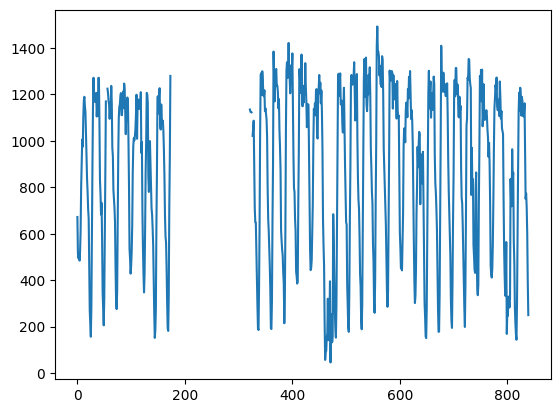

In [19]:
plt.plot(list(range((7*24*5))), champs["Débit horaire"][:(7*24*5)])

<AxesSubplot: >

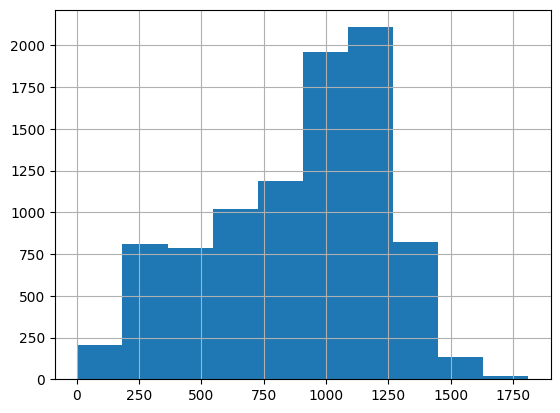

In [118]:
champs["Débit horaire"].hist()

<AxesSubplot: >

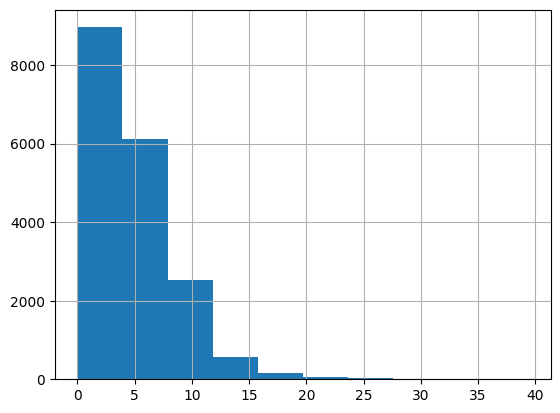

In [101]:
aval_amont["Taux d'occupation"].hist()